# 8- MÉTRICAS

 La rápida expansión de NILM y el desarrollo de diferentes algoritmos, han hecho que sea esencial proporcionar una evaluación de rendimiento mediante el uso de métricas de desempeño. Las métricas de evaluación, comparan los resultados de la desagregaciónn (predicciones) de los modelos entrenados con los datos del set de validación (mediciones reales de cada proceso). NILMTK cuenta con el cálculo de métricas de evaluación mediante el uso del MeterGroup para la validación de los resultados mediante el set de validación 
 Vamos ahora analizar en nuestro dataset diferentes metricas como son FEAC,F1, EAE ,MNEAP y RMSE  que  resumimos a continuacion en el siguinte cuadro:

![metricas](metricas.jpg)

En primer lugar cargamos las ibrerías y realizamos otros ajustes:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

from nilmtk import TimeFrame, MeterGroup, HDFDataStore, DataSet
from nilmtk.metrics import fraction_energy_assigned_correctly, mean_normalized_error_power
from nilmtk.metrics import rms_error_power, f1_score, error_in_assigned_energy

data_dir='./data/'

### Métricas individuales del modelo

In [2]:
#Librerías
from nilmtk.metrics import f1_score
from nilmtk.metrics import error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power
from nilmtk.metrics import rms_error_power
from nilmtk.metrics import fraction_energy_assigned_correctly

In [8]:

labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})


 

#Set para validación
valid = DataSet('dsualmh.h5')
valid.set_window(start="2023-03-07 14:58:35", end="2023-03-07 15:42:22")
valid_elec = valid.buildings[1].elec

print('Medidor de cabecera para desagregación:')
valid_Main = valid_elec.mains()
print(valid_Main)

print('\nDispositivos para validación de entrenamiento:')
valid_Devices = valid_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
print(valid_Devices)




index = list(labels['Meters'][1:11])
met = []
e = []

#Datos de Dispositivos: predicción
#dataset=DataSet(data_dir+'NILM/Results/FHMM_60s_first_pred.h5')





#dataset=DataSet(data_dir+'NILM/Results/CO_30s_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.129	0.400	0.519	0.061	0.424	0.222	0.333	0.574	0.455	0.400
#EAE	0.003	0.077	0.003	0.050	0.025	0.192	0.005	0.002	0.061	0.089
#MNEAP	1.808	1.487	0.847	2.292	1.309	1.059	1.400	0.680	2.987	5.608
#RMSE	877.262	514.697	23.137	615.359	342.614	994.239	734.337	19.083	153.247	281.465


#mejores resultados
dataset=DataSet(data_dir+'NILM/Results/CO_60s_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.364	0.240	0.465	0.095	0.375	0.154	0.276	0.368	0.300	0.353
#EAE	0.003	0.160	0.006	0.102	0.042	0.155	0.061	0.007	0.005	0.005
#MNEAP	1.372	1.942	0.796	2.951	1.224	1.295	1.243	0.731	1.098	1.104
#RMSE	775.544	588.700	22.078	770.649	329.974	1031.608	653.505	20.528	46.811	36.255

#dataset=DataSet(data_dir+'NILM/Results/CO_30s_median_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.190	0.091	0.566	0.188	0.467	0.364	0.400	0.614	0.500	0.370
#EAE	0.168	0.045	0.005	0.050	0.006	0.092	0.061	0.002	0.002	0.007
#MNEAP	2.240	2.102	0.712	1.969	1.129	1.181	0.981	0.654	0.941	1.150
#RMSE	1015.848	641.191	21.139	538.117	312.914	1016.484	597.588	18.658	41.881	36.353


#dataset=DataSet(data_dir+'NILM/Results/CO_10min_first_pred.h5')
#Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#EAE	0.210	0.154	0.016	0.101	0.139	0.350	0.275	0.016	0.024	0.017
#MNEAP	1.000	1.000	1.000	1.000	1.000	1.000	1.000	1.000	1.000	1.000
#RMSE	416.976	266.858	22.980	258.817	216.583	484.321	556.644	21.606	43.440	33.426

#co :empeora las metricas al aumentar el sampleo


#dataset=DataSet(data_dir+'NILM/Results/FHMM_5min_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.000	0.333	0.000	0.000	0.000	0.000	0.333	0.000	0.000
#EAE	0.027	0.016	0.003	0.036	0.023	0.259	0.024	0.003	0.001	0.000
#MNEAP	1.013	1.080	0.604	1.858	0.856	0.881	0.892	0.496	0.439	0.671
#RMSE	304.042	261.513	15.181	344.114	185.695	523.226	415.140	13.034	18.548	18.223


#dataset=DataSet(data_dir+'NILM/Results/FHMM_15min_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#EAE	0.104	0.026	0.004	0.004	0.038	0.043	0.015	0.001	0.009	0.002
#MNEAP	1.512	0.716	0.065	1.228	1.391	0.706	0.345	0.457	0.289	0.439
#RMSE	295.186	124.828	1.729	179.330	176.910	288.617	206.371	9.525	17.203	21.423

#fhmm: malos resultados


predictions=dataset.buildings[1].elec.submeters()      

#Metricas
f1 = {};
eae = {};
feac = {};
mneap = {};
rmse = {};



f1['F1'] = f1_score(predictions, valid_Devices)

EAE = error_in_assigned_energy(predictions, valid_Devices)

for x in range(len(EAE)): e.append(EAE.iloc[x][0])
eae['EAE'] = e
#da error esta medida AttributeError: 'tuple' object has no attribute 'instance'
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                      pd.DataFrame(f1),
                      pd.DataFrame(eae, index=valid_Devices.instance()),
                      pd.DataFrame(mneap),
                      pd.DataFrame(rmse)],
                     axis=1).set_index(pd.Index(index)))

dataset.store.close()       
print('\n\nDone!')
metrics=met[0].transpose().round(3)
metrics

Medidor de cabecera para desagregación:
ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Dispositivos para validación de entrenamiento:
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(ins

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,0.129,0.400,0.519,0.061,0.424,0.222,0.333,0.574,0.455,0.400
EAE,0.003,0.077,0.003,0.050,0.025,0.192,0.005,0.002,0.061,0.089
MNEAP,1.808,1.487,0.847,2.292,1.309,1.059,1.400,0.680,2.987,5.608
RMSE,877.262,514.697,23.137,615.359,342.614,994.239,734.337,19.083,153.247,281.465


Carga de datos de predicciones y GT en memoria

In [9]:
gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=60, resample_kwargs={'how':'first'})


labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})


Meters={}
for x in range(len(labels)): Meters[valid_elec[x+1]]=labels['Meters'][x]
    

    
    
#resultados de predicción modelo CO 60s
CO_60s_first=DataSet(data_dir+'NILM/Results/CO_60s_first_pred.h5')
elec_CO_60s_first=CO_60s_first.buildings[1].elec

#resultados de predicción modelo FHMM 60s
FHMM_60s_first=DataSet(data_dir+'NILM/Results/FHMM_5min_first_pred.h5')
elec_FHMM_60s_first= FHMM_60s_first.buildings[1].elec    
    
    

gt.columns=list(Meters.values())
pred_CO=elec_CO_60s_first.dataframe_of_meters(ac_type='active')

pred_CO.columns=[list(Meters.values())[0]]+list(Meters.values())[1:12]

pred_FHMM=elec_FHMM_60s_first.dataframe_of_meters(ac_type='active')

pred_FHMM.columns=[list(Meters.values())[0]]+list(Meters.values())[1:12]

### Análisis particular del cálculo de cada métrica

Metrica FEAC ( da problema con AttributeError: 'tuple' object has no attribute 'instance')

In [10]:
#Carga de datos de predicciones y GT en memoria
#gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=60, resample_kwargs={'how':'first'})
#gt.columns=list(Meters.values())

In [11]:
#predictions_Devices=elec_CO_60s_first.submeters()

#frac_1 = valid_Devices.fraction_per_meter()
#frac_2 = predictions_Devices.fraction_per_meter()
#fig, (ax1, ax2) = plt.subplots(1, 2 ,gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

#frac_1.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',labels=list(Meters.values())[1:6], figsize=(8,8), ax=ax1,   colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan'])
#frac_2.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',  labels=list(Meters.values())[1:6], figsize=(8,8), ax=ax2,  colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']) 

#ax1.set(ylabel="")
#ax1.set(xlabel="GT")
#ax2.set(ylabel="")
#ax2.set(xlabel="Predictions")
#plt.savefig('./data/images/5.4_FEAC_CO_60s.svg', bbox_inches='tight', transparent=True)
#pass

## Métrica F1

Esta métrica mide la precisión o asertividad del modelo entrenado mediante el cálculo de la media armónica utilizando las métricas Precision y Recall. Estas métricas son calculadas internamente por NILMTK mediante la matriz de confusión, vease la ecuación de la figura siguiente.

![metricas](metricas.jpg)

Precision se entiende como la fracción de cortes de tiempo en los que se predijo correctamente que un proceso estaba activo, pero realmente se encontraba apagado. Por lo contrario, Recall hace referencia a la fracción de cortes de tiempo en los que se predijo correctamente que el dispositivo estaba encendido y realmente se encontraba encendido .

In [12]:
pd.DataFrame(metrics.loc['F1']).transpose()*100

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,12.9,40.0,51.9,6.1,42.4,22.2,33.3,57.4,45.5,40.0


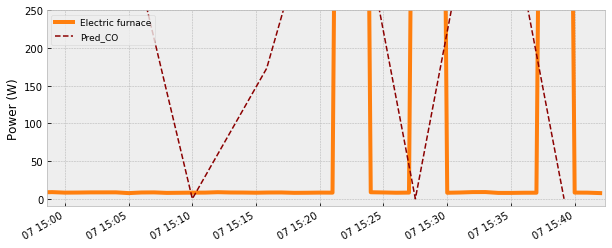

In [14]:
rcParams['figure.figsize'] = (10, 4)

t0='2023-03-07 14:58:35+01:00' #tiempo inicial
t1='2023-03-07 15:42:22+01:00' #tiempo final


fig, ax1 = plt.subplots();
ax1=gt['Electric furnace'].plot(lw=4, c='tab:orange')
pred_CO['Electric furnace'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric furnace','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

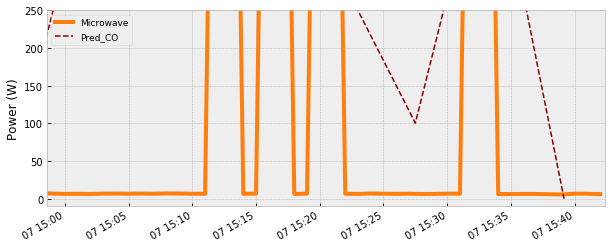

In [15]:
rcParams['figure.figsize'] = (10, 4)


fig, ax1 = plt.subplots();
ax1=gt['Microwave'].plot(lw=4, c='tab:orange')
pred_CO['Microwave'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Microwave','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

       

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

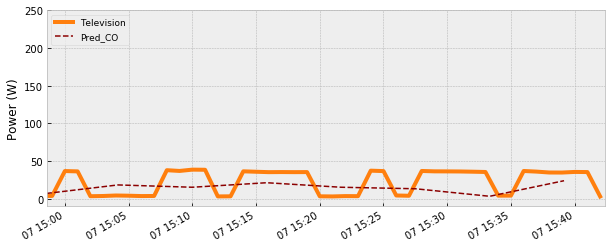

In [16]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Television'].plot(lw=4, c='tab:orange')
pred_CO['Television'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Television','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

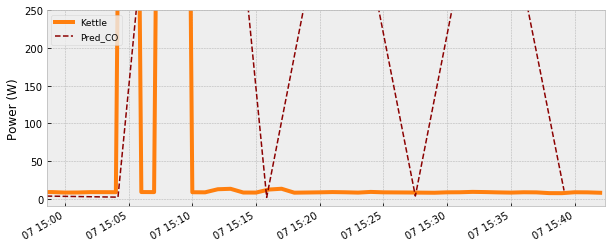

In [17]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Kettle'].plot(lw=4, c='tab:orange')
pred_CO['Kettle'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Kettle','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

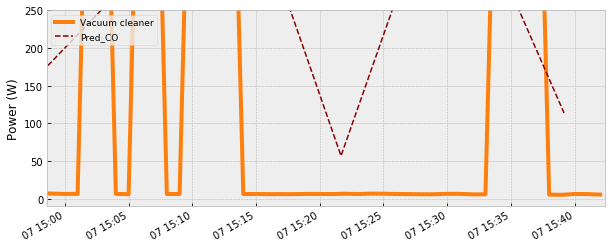

In [18]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Vacuum cleaner'].plot(lw=4, c='tab:orange')
pred_CO['Vacuum cleaner'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Vacuum cleaner','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

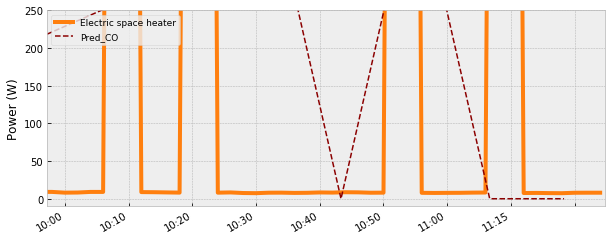

In [19]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Electric space heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric space heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric space heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()
ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')




plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

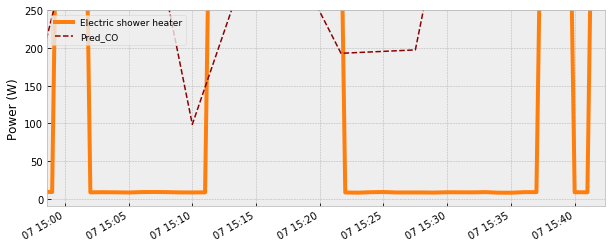

In [20]:
rcParams['figure.figsize'] = (10, 4)


fig, ax1 = plt.subplots();
ax1=gt['Electric shower heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric shower heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric shower heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

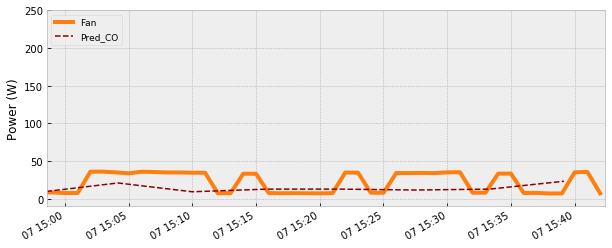

In [21]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fan'].plot(lw=4, c='tab:orange')
pred_CO['Fan'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fan','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')



plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

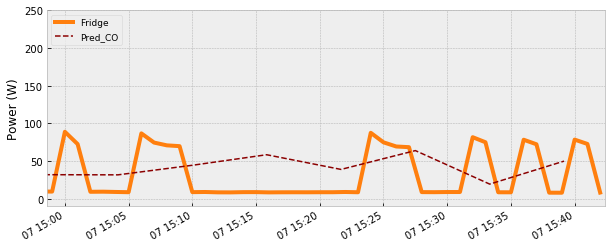

In [22]:
rcParams['figure.figsize'] = (10, 4)

fig, ax1 = plt.subplots();
ax1=gt['Fridge'].plot(lw=4, c='tab:orange')
pred_CO['Fridge'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fridge','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_ylabel('Power (W)')

         

plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

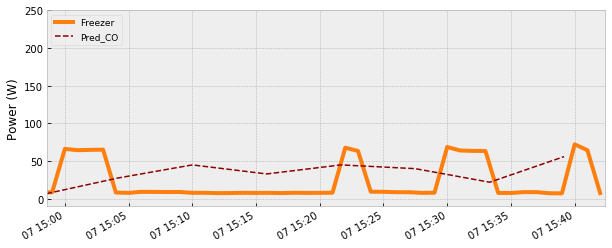

In [23]:
rcParams['figure.figsize'] = (10, 4)
fig, ax1 = plt.subplots();
ax1=gt['Freezer'].plot(lw=4, c='tab:orange')
pred_CO['Freezer'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Freezer','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()
ax1.set_ylabel('Power (W)')




plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

## Métrica EAE

La ecuación de la figura representa la diferencia entre la energía total asignada yˆt(n) energía total consumida yt(n) por el proceso n de la industria en kWh 

![metricas](metricas.jpg)

In [24]:
round(pd.DataFrame(metrics.loc['EAE']).transpose(),2)

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
EAE,0.0,0.08,0.0,0.05,0.02,0.19,0.0,0.0,0.06,0.09


In [25]:
predictions_Devices=elec_CO_60s_first.submeters()
e1=predictions_Devices[10].total_energy()[0]
e2=valid_Devices[10].total_energy()[0]
eae=round(abs(e1-e2),2)

pd.DataFrame([e1,e2,eae], columns=['kWh'], index=['Energy_pred','Energy_GT','EAE'])

,kWh
Energy_pred,0.030900
Energy_GT,0.002857
EAE,0.030000


## Métrica MNEAP

Este indicador que representa la ecuacion de la imagen  consta de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) de cada proceso de la industria, por cada intervalo de tiempo t. Después de sumar todas las diferencias de potencia, el resultado es normalizado por el consumo total de la energía del proceso 

![metricas](metricas.jpg)

In [26]:
round(pd.DataFrame(metrics.loc['MNEAP']).transpose(),2)

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
MNEAP,1.81,1.49,0.85,2.29,1.31,1.06,1.4,0.68,2.99,5.61


## Métrica RMSE

Esta métrica de la ecuación de la figura es muy utilizada en la comparaciónn de diversos conjuntos de datos, consiste en el error cuadrático medio de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) del proceso de los applicativos , en cada intervalo de tiempo t .

![metricas](metricas.jpg)

In [27]:
round(pd.DataFrame(metrics.loc['RMSE']).transpose(),1)

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
RMSE,877.3,514.7,23.1,615.4,342.6,994.2,734.3,19.1,153.2,281.5


## Resultados de todos los modelos

In [28]:
from nilmtk.metrics import fraction_energy_assigned_correctly, f1_score, error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power, rms_error_power 
periods = {  '5min':60*5, '10min':60*10, '15min':60*15}
#periods = { '60s':60, '5min':60*5, '10min':60*10}


dir_predictions = data_dir +'NILM/Results/'
m = {}
classifiers = ['CO', 'FHMM']
methods = ['first', 'mean', 'median']
index = list(labels['Meters'][1:12])

for p_name, sp in periods.items():
    met = []
    for method in methods:
        for clf_name in classifiers:
            print('\nCalculando Metricas: '+ clf_name + '_' + p_name + '_' + method)  
           
            #Datos de Dispositivos: predicción
            input_dir = dir_predictions + clf_name + '_' + p_name + '_' + method +'_pred.h5'
            dataset = DataSet(input_dir)
            predictions=dataset.buildings[1].elec.submeters()       
            
            #Metricas
            f1 = {};
            eae = {};
            feac = {};
            mneap = {};
            rmse = {};
            e=[];  
            
            
            F1 = f1_score(predictions, valid_Devices)
            f1['F1'] = F1*100
            EAE = error_in_assigned_energy(predictions, valid_Devices)
            
            for x in range(len(EAE)): e.append(EAE.iloc[x][0])
            eae['EAE'] = e
            #da error para FEAC
            #feac['FEAC'] = 100*np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
            mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
            rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
            met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                                  pd.DataFrame(f1),
                                  pd.DataFrame(eae, index=valid_Devices.instance()),
                                  pd.DataFrame(mneap),
                                  pd.DataFrame(rmse)],
                                 axis=1).set_index(pd.Index(index)))
            dataset.store.close()        
    m[p_name] = met

##Guardamos resultados
f = open(data_dir +'NILM/metrics.txt',"w")
f.write( str(m) )
f.close()
print('\n\nDone!')




Calculando Metricas: CO_5min_first

Calculando Metricas: FHMM_5min_first

Calculando Metricas: CO_5min_mean

Calculando Metricas: FHMM_5min_mean

Calculando Metricas: CO_5min_median

Calculando Metricas: FHMM_5min_median

Calculando Metricas: CO_10min_first

Calculando Metricas: FHMM_10min_first

Calculando Metricas: CO_10min_mean

Calculando Metricas: FHMM_10min_mean

Calculando Metricas: CO_10min_median

Calculando Metricas: FHMM_10min_median

Calculando Metricas: CO_15min_first

Calculando Metricas: FHMM_15min_first

Calculando Metricas: CO_15min_mean

Calculando Metricas: FHMM_15min_mean

Calculando Metricas: CO_15min_median

Calculando Metricas: FHMM_15min_median


Done!


## Otras Metricas: métricas Promedio

In [32]:
m_mean = {}

#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']
labels=['CO-first', 'CO-mean', 'CO-median', 'FHMM-first', 'FHMM-mean' ,'FHMM-median']
#per=['60s','5min','10min']
per=['5min','10min', '15min']


for c in cols:
  m_mean[c] = pd.DataFrame([#CO FIRST
                             [m['5min'][0][c].mean(),
                              m['10min'][0][c].mean(),m['15min'][0][c].mean()],
                              #CO MEAN
                             [m['5min'][2][c].mean(),
                              m['10min'][2][c].mean(),m['15min'][2][c].mean()],
                              #CO MEDIAN
                             [m['5min'][4][c].mean(),
                              m['10min'][4][c].mean(),m['15min'][4][c].mean()],
                             #FHMM FIRST
                             [m['5min'][1][c].mean(),
                             m['10min'][1][c].mean(),m['15min'][1][c].mean()],
                             #FHMM MEAN            
                             [m['5min'][3][c].mean(),
                              m['10min'][3][c].mean(),m['15min'][3][c].mean()],
                             #FHMM MEDIAN
                             [m['5min'][5][c].mean(),
                              m['10min'][5][c].mean(),m['15min'][5][c].mean()]],columns=per, index=labels).transpose()
m_mean



{'F1':        CO-first   CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 5min   2.222222  5.079365        2.0    6.666667        2.5     5.357143
 10min  0.000000  0.000000        0.0    0.000000        0.0     0.000000
 15min  0.000000  0.000000        0.0    0.000000        0.0     0.000000,
 'EAE':        CO-first   CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 5min   0.128787  0.062663   0.129212    0.039185   0.033359     0.067009
 10min  0.130154  0.000000   0.000000    0.000000   0.000000     0.000000
 15min  0.100276  0.000000   0.000000    0.000000   0.000000     0.000000,
 'MNEAP':        CO-first   CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 5min   0.905459  1.051451   0.922893    0.878963   0.880475     0.797974
 10min  1.000000  0.927209   1.000000    0.786465   0.805285     0.718834
 15min  1.000000  1.000000   1.000000    0.714706   0.727802     0.698891,
 'RMSE':          CO-first     CO-mean   CO-median  FHMM-first   FHMM-mean  FHMM-median

## Maximos


In [33]:
cols=['F1','EAE','MNEAP','RMSE']

maxs=pd.concat([m_mean['F1'].transpose().max(),
                m_mean['EAE'].transpose().min(),
                m_mean['MNEAP'].transpose().min(),
                m_mean['RMSE'].transpose().min()], axis=1)
maxs.columns=cols
maxs = maxs.transpose()
round(maxs,2)

,5min,10min,15min
F1,6.67,0.00,0.00
EAE,0.03,0.00,0.00
MNEAP,0.80,0.72,0.70
RMSE,209.87,165.58,132.11


## Correspondencia de Indice

In [34]:
cols=['F1','EAE','MNEAP','RMSE']

maxs_i=pd.concat([m_mean['F1'].transpose().idxmax(),
                 m_mean['EAE'].transpose().idxmin(),
                 m_mean['MNEAP'].transpose().idxmin(),
                 m_mean['RMSE'].transpose().idxmin()], axis=1)
maxs_i.columns=cols
maxs_i = maxs_i.transpose()
maxs_i

,5min,10min,15min
F1,FHMM-first,CO-first,CO-first
EAE,FHMM-mean,CO-mean,CO-mean
MNEAP,FHMM-median,FHMM-median,FHMM-median
RMSE,FHMM-first,FHMM-mean,FHMM-first


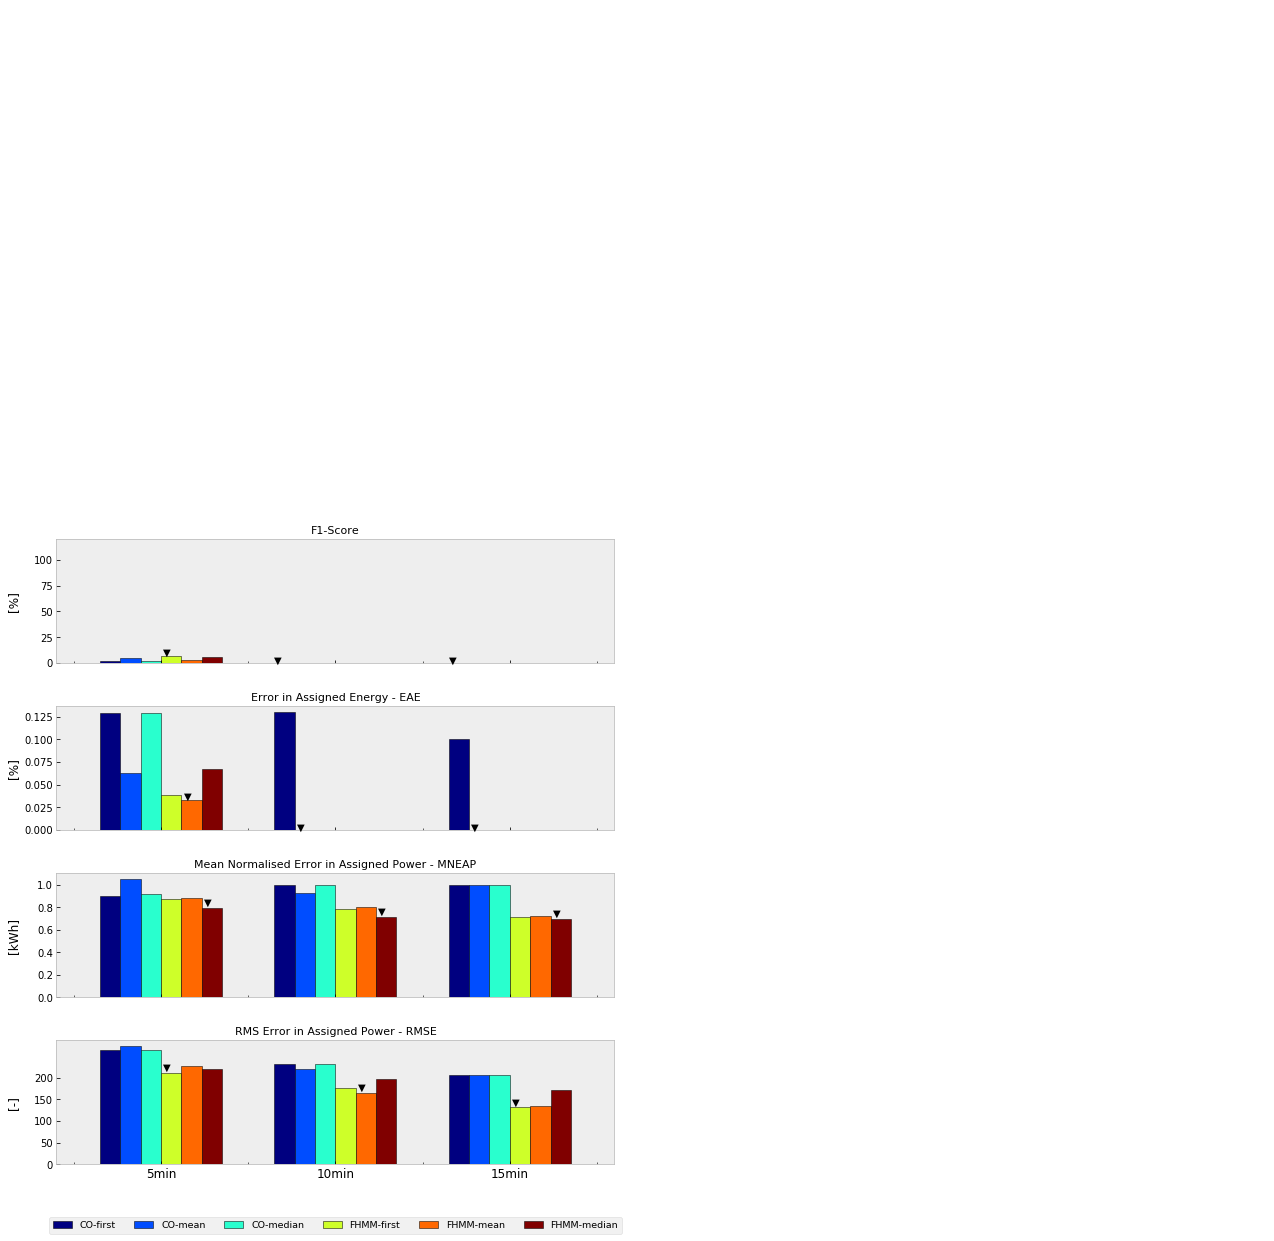

In [35]:
rcParams['figure.figsize'] = (10, 11.5)
fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0.35})
cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
per=['5min','10min','15min']

labels={'CO-first':-0.35, 'CO-mean':-0.22, 'CO-median':-0.11, 'FHMM-first':0.01, 'FHMM-mean':0.13 ,'FHMM-median':0.245}

c=0
for ax in fig.get_axes():      
    m_mean[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, cmap="jet")
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    x = 0
    for p in per:
        ax.annotate("▼", xy=(labels[maxs_i[p][cols[c]]]+x, maxs[p][cols[c]]+maxs[p][cols[c]]*0.03))
        x+=1
    c+=1
    
ax5.set_xticklabels(labels=per, rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax2,ax3,ax4,ax5)])
ax2.set(ylim=(0,120))
ax2.set_yticks([0,25,50,75,100])

ax5.set_yticks([0,50,100,150,200])

ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels.keys(), loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.6),fontsize=9.5)


#ax2.annotate("90.5%", xy=(0.68, 98)); #30s FHMM-mean
#ax3.annotate("0.19", xy=(6.22, 1.4)); #30min FHMM-median
ax3.annotate("kWh", xy=(6.22, 0.9)); #30min FHMM-median
#ax4.annotate("0.24", xy=(6.22, 0.7)); #30min FHMM-median
#ax5.annotate("41.5", xy=(6.22, 120)); #30min FHMM-median
ax5.annotate("   W", xy=(6.22, 90)); #30min FHMM-median


plt.savefig('./data/images/5.7_All_metrics.svg', bbox_inches='tight', transparent=True)

pass

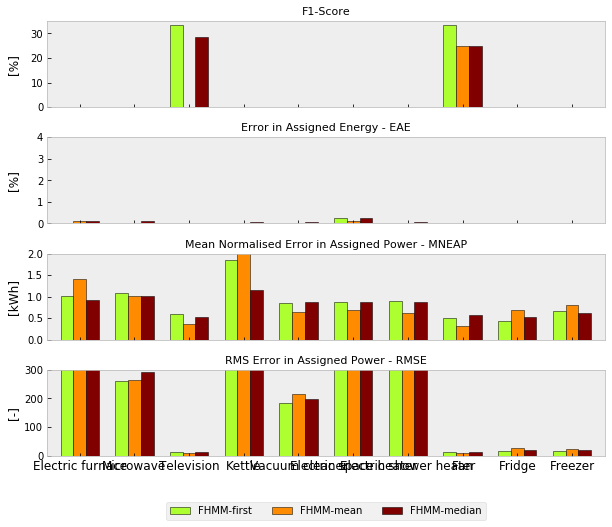

In [37]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})

#cols=['FEAC','F1','EAE','MNEAP','RMSE']
cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
labels=['FHMM-first', 'FHMM-mean' ,'FHMM-median']
c=0

for ax in fig.get_axes():
    
    df=pd.DataFrame([m['5min'][1][cols[c]],m['5min'][3][cols[c]],m['5min'][5][cols[c]]]).transpose()
    #if ax==ax1:
    #    df['FEAC'].mean().plot.barh(ax=ax1, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    #else:
    #     df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
 
    df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1   
    

ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax1,ax2,ax3,ax4,ax5)])
ax3.set_yticks([0,1,2,3,4])
ax4.set(ylim=(0,1.8))
ax4.set_yticks([0,0.5,1,1.5,2])
ax5.set(ylim=(0,270))
ax5.set_yticks([0,100,200,300])
ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))


plt.savefig('./data/images/5.8_All_metrics_2.svg', bbox_inches='tight', transparent=True)

pass

In [38]:
print('FHMM-first')
print(m['5min'][1])
print('\nFHMM-mean')
print(m['10min'][3])
print('\nFHMM-median')
print(m['15min'][5])

FHMM-first
                               F1       EAE     MNEAP        RMSE
Electric furnace         0.000000  0.026623  1.013159  304.042122
Microwave                0.000000  0.016108  1.079936  261.513182
Television              33.333333  0.002754  0.604203   15.181196
Kettle                   0.000000  0.035884  1.857725  344.113735
Vacuum cleaner           0.000000  0.023422  0.855639  185.695234
Electric space heater    0.000000  0.259439  0.880965  523.226097
Electric shower heater   0.000000  0.023797  0.891982  415.140126
Fan                     33.333333  0.002940  0.495519   13.034259
Fridge                   0.000000  0.000604  0.439437   18.548207
Freezer                  0.000000  0.000278  0.671070   18.222706

FHMM-mean
                         F1  EAE     MNEAP        RMSE
Electric furnace        0.0  0.0  1.472491  412.718247
Microwave               0.0  0.0  0.880574  194.652137
Television              0.0  0.0  0.338002    8.934359
Kettle                  0.0  0.0

### Resultados del mejor modelo
En vista de los resultados del obtenidos, se propone la elección del modelo FHMM entrenado con datos promedio de dispositivos cada 30 segundos. Este modelo solo se considera adecuado para la desagregación de datos promedio de potencia activa medidos en cabecera cada 30 segundos.


 ## INDICES DEL DATAFRAME

CO_60s_first:0

FHMM_60s_first:1

CO_60s_mean:2

FHMM_60s_mean :3

CO_60s_median:4

FHMM_60s_median:5


------------------------------


CO_5min_first:6

FHMM_5min_first:7

CO_5min_mean:8

FHMM_5min_mean:9

CO_5min_median:10

 FHMM_5min_median:11


----------------------------


CO_10min_first:12

FHMM_10min_first:13

CO_10min_mean:14

FHMM_10min_mean :15

CO_10min_median:16

FHMM_10min_median:17

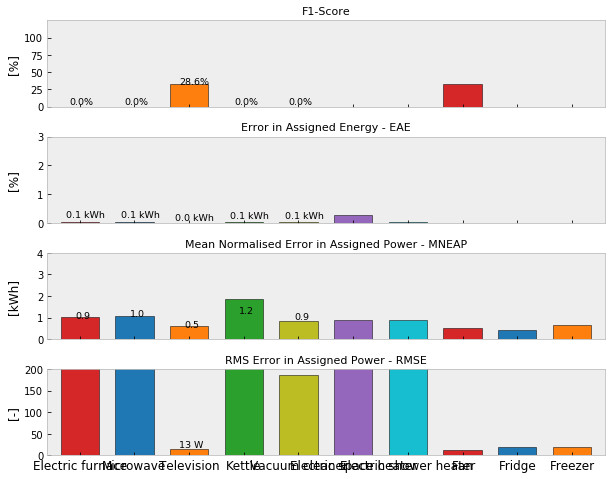

In [42]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})
#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
colors=['tab:red','tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']
c=0

for ax in fig.get_axes():
    df=pd.DataFrame(m['5min'][1][cols[c]])
    df[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, color=colors)
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1


ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})

fig.align_ylabels([(ax2,ax3,ax4,ax5)])

ax2.set(ylim=(0,125))
ax3.set(ylim=(0,1))
ax4.set(ylim=(0,0.7))
ax5.set(ylim=(0,110))

ax2.set_yticks([0,25,50,75,100])
ax3.set_yticks([0,1,2,3])
ax4.set_yticks([0,1,2,3,4])
ax5.set_yticks([0,50,100,150,200])


ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')

df=pd.DataFrame(m['5min'][5])

for x in range(5):ax2.annotate(str(round(df['F1'][x],1))+'%', xy=(x-0.18 , df['F1'][x]+4),fontsize=9.5)
for x in range(5):ax3.annotate(str(round(df['EAE'][x],1))+' kWh', xy=(x-0.25 , df['EAE'][x]+0.1),fontsize=9.5)
for x in range(5):ax4.annotate(str(round(df['MNEAP'][x],1)), xy=(x-0.08 , df['MNEAP'][x]+0.03),fontsize=9.5)
for x in range(5):ax5.annotate(str(round(df['RMSE'][x]))+' W', xy=(x-0.18 , df['RMSE'][x]+5),fontsize=9.5)

plt.savefig('./data/images/5.9_Metrics_FHMM_30min_median.svg', bbox_inches='tight', transparent=True)

In [43]:
valid_Devices.total_energy()

Calculating total_energy for ElecMeterID(instance=11, building=1, dataset='dsualmh') ...   

reactive    0.067877
active      1.326767
apparent    1.339009
dtype: float64

In [44]:
valid_Devices.energy_per_meter()

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, dsualmh)","(3, 1, dsualmh)","(4, 1, dsualmh)","(5, 1, dsualmh)","(6, 1, dsualmh)","(7, 1, dsualmh)","(8, 1, dsualmh)","(9, 1, dsualmh)","(10, 1, dsualmh)","(11, 1, dsualmh)"
active,0.210504,0.153937,0.016716,0.101349,0.139441,0.350376,0.29332,0.016472,0.025939,0.018713
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replicando el entrenamiento del modelo

In [45]:
from nilmtk import DataSet
from nilmtk.legacy.disaggregate import FHMM


train = DataSet('dsualmh.h5')

train.set_window(start="2023-03-07 11:10:38", end="2023-03-07 12:10:00")

train_elec=train.buildings[1].elec 

#dispositivos a entrenar: 
train_Devices=train_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])



#entrenamiento y exportación del modelo
FHMM_30s_median=FHMM()
FHMM_30s_median.MIN_CHUNK_LENGTH=1
FHMM_30s_median.train(train_Devices,
                        num_states_dict={}, #en otro caso: { }
                        ac_type='active',
                        sample_period=1800,
                        resample_kwargs={'how':'median'})



print('\n\nDone!')


Training model for submeter 'ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='

In [46]:
from nilmtk.legacy.disaggregate import FHMM
FHMM=FHMM()
#FHMM.import_model('C:/data/FHMM_30s_median_model.pickle') 
print('Oven: '+str(FHMM_30s_median.individual[valid_Devices[2]].means_))
print('Microwave: '+str(FHMM_30s_median.individual[valid_Devices[3]].means_))
print('Television: '+str(FHMM_30s_median.individual[valid_Devices[4]].means_))
print('Kettle: '+str(FHMM_30s_median.individual[valid_Devices[5]].means_))
print('Vacuum Cleaner: '+str(FHMM_30s_median.individual[valid_Devices[6]].means_))

print('electric space heater: '+str(FHMM_30s_median.individual[valid_Devices[7]].means_))
print('electric shower heater: '+str(FHMM_30s_median.individual[valid_Devices[8]].means_))
print('Fan: '+str(FHMM_30s_median.individual[valid_Devices[9]].means_))
print('Fridge: '+str(FHMM_30s_median.individual[valid_Devices[10]].means_))
print('Freezer: '+str(FHMM_30s_median.individual[valid_Devices[11]].means_))


Oven: [[8.42022292]]
Microwave: [[6.93598286]]
Television: [[25.17810504]]
Kettle: [[8.86301327]]
Vacuum Cleaner: [[6.55046384]]
electric space heater: [[8.58766969]]
electric shower heater: [[390.96100966]]
Fan: [[20.9746081]]
Fridge: [[9.16555341]]
Freezer: [[8.20585855]]


In [47]:
FHMM_30s_median.model

GaussianHMM(covariance_type='full')

In [48]:
FHMM_30s_median.individual

OrderedDict([(ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', i